# 量子ボリュームの測定

![hero:quantum volume](images/quantum_volume.png)


## なぜ量子ボリュームなのか？

異なる量子コンピューターを比較することは、簡単なことではありません。量子コンピューターの性能に影響を与える要因はさまざまであり、有用な量子計算を行う際にどの要因が最も大きな影響を与えるかは必ずしも明らかではありません。

あなたが量子コンピューターを設計しているとします。量子ビットの連結性（コネクティビティー）の低下（より長い回路が必要）と、より高い忠実度のゲート（エラーが少ない）をトレードするでしょうか？例えば、優れた[トランスパイラー](gloss:transpiler)があれば、連結性の低下はそれほど問題ではなく、スワップを構造化することができるかもしれません。または、読み出しエラーが非常に大きいので、ゲート忠実度の向上はいずれにせよ無視できるものかもしれません。量子コンピューターの得点表にこれらの統計情報を追加することは可能ですが、各要素の正確な重要性については議論が必要です。たとえ、個々の要素で高得点を獲得できたとしても、量子回路を動作させる際に予期せぬ問題が発生する可能性があります。

一つ確かなことは、[量子優位性](gloss:quantum-advantage)を得るためには、多くの量子ビットと、それらを精密に操作する能力が必要だということです。もし十分な量子ビットがなければ、有用な計算はできないし、もしこれらの量子ビットが十分な精度や信頼性を持っていなければ、我々の測定は無意味なものとなってしまいます。

<!-- ::: q-block.tabs -->

## 計算能力に影響を与えるものは？

<!-- ::: tab -->

### 量子ビット数

<!-- ::: column(width=350) -->

**量子ビット数（多いほど良い）**

量子コンピューターの量子ビットの数は、計算能力の上限を決めています。古典的なコンピューターに対して優位に立つためには、できるだけ多くの量子ビットをエンタングルさせることが必要です。

<!-- ::: column(width=250) -->

<img src="images/qubit_count.png" width="195">

<!-- ::: -->

<!-- ::: tab -->

### 読み出しエラー

<!-- ::: column(width=350) -->

**ゲートエラー、読み出しエラー（少ない方が良い）**

前述したように、量子コンピューターのエラーは、量子コンピューターの能力の上限を決めるものでもあります。もし、量子状態を確実に操作できないのであれば、量子コンピューターから意味のある結果を得ることはできないでしょう。

<!-- ::: column(width=250) -->

<img src="images/readout_errors.png" width="195">

<!-- ::: -->

<!-- ::: tab -->

### 連結性（コネクティビティー）

<!-- ::: column(width=350) -->

**量子ビット間の連結性（多ければ多いほど良い）**

もし2つの量子ビットが直接通信できない場合、それらを正しい場所に移動させるために「スワップ」ゲートを追加する必要があり、計算の長さが長くなってしまうのです。量子ボリューム回路は完全な連結性を仮定しているので、スワップゲートを追加する必要がある場合は、あなたの責任になります。

<!-- ::: column(width=250) -->

<img src="images/connectivity.png" width="195">

<!-- ::: -->

<!-- ::: tab -->

### ゲートセット

<!-- ::: column(width=350) -->

**ゲートセット（大きい/高性能な方が良い）**

量子ボリュームはランダムな2量子ビットのゲートを要求しますが、それをどのように実装するかを考えるのもあなた次第です。もし、ハードウェアがより多くのゲートをサポートしていれば、まともな結果が得られる可能性が高くなります。

<!-- ::: column(width=250) -->

<img src="images/gate_set.png" width="195">

<!-- ::: -->

<!-- ::: tab -->

### ソフトウェアスタック

<!-- ::: column(width=350) -->

**コンパイラーとソフトウェアスタック（よりインテリジェントであるほど良い）**

その他の問題（スワップゲートの追加挿入、使用可能なゲートセットからの指定ゲート作成、ノイズへの対応）は、トランスパイラーなどのインテリジェントな古典ソフトウェアで軽減することができます。

<!-- ::: column(width=250) -->

<img src="images/software_stack.png" width="195">

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->


そこで登場するのが量子ボリュームです。量子ボリュームは*全体的な*ベンチマークです。細部を見るのではなく、量子コンピューターが量子回路を実行するという、我々が望むことを行うのにどれだけ優れているかを測定するのです。量子ボリュームテストでは、指定された回路をランダムに作成し、量子コンピューターの「スコア」は、確実に実行できる回路の大きさに応じて増加します。

この章では、次のことを学びます。

1. 量子ボリュームとは何か。
2. ランダムな正方形回路の作り方。
3. あるデバイスがある量子ボリュームを達成できるかどうかを確認する方法。
4. Qiskitのツールを使って簡単に実行するには、どうすればいいのか。

## 量子ボリュームとは？

量子ボリューム(QV)は量子コンピューターの能力を測定するために使用される単一の数値指標です。量子ビットの数が控えめな近い将来のデバイスに使用され、[幅(width)](gloss:width)と[深さ(depth)](gloss:depth)が等しいランダム回路のうち、確実に実行できる最大のものを測定します。

<!-- ::: q-block -->

## ビジュアルデモ


    q-what-is-quantum-volume(goal="wiqv-explored")

<!-- ::: -->


## 量子ボリュームプロトコル

### 概要

量子ボリュームベンチマークを行うには、まず、サイズ $d$ の回路を大量に作成します。そして、その回路をシミュレーションして、最も可能性の高い出力を記録します。同じ回路をテストするデバイスで実行し、出力がシミュレーションしたものとどの程度一致するかを確認します。その結果、十分な結果が得られたら、dを大きくしてやり直します。デバイスの量子ボリュームは、デバイスが許容できる最大の回路サイズの2のべき乗となります。

<div class="qv-overview">

<!-- ::: column(width=25) -->

## 1.

<!-- ::: column(width=100) -->

![test](images/overview-1.png)

<!-- ::: column.grow -->

幅と深さが $d$ のランダムな回路の集合を作成します。

<!-- ::: -->


<!-- ::: column(width=25) -->

## 2.

<!-- ::: column(width=100) -->

![test](images/overview-2.png)

<!-- ::: column.grow -->

回路をシミュレートし、どの出力が最も可能性が高いかを記録します。

<!-- ::: -->


<!-- ::: column(width=25) -->

## 3.

<!-- ::: column(width=100) -->

![test](images/overview-3.png)

<!-- ::: column.grow -->

テストするデバイスで回路を実行し、結果を記録します。

<!-- ::: -->


<!-- ::: column(width=25) -->

## 4.

<!-- ::: column(width=100) -->

![test](images/overview-4.png)

<!-- ::: column.grow -->

デバイスの結果が静的にシミュレーションの結果に十分近ければ、$d$ を増やしてステップ1に進みます。失敗するまで繰り返します。

<!-- ::: -->


<!-- ::: column(width=25) -->

## 5.

<!-- ::: column(width=100) -->

![test](images/overview-5.png)

<!-- ::: column.grow -->

量子ボリュームは $ 2^{d_{\text{max}}} $ です。ここで、$d_{\text{max}}$ は私たちのデバイスが正常に動作する最大の回路の幅と深さです。

<!-- ::: -->

</div>



## 正方形回路

正方形回路とは、[幅](gloss:width)と[深さ](gloss:depth)が等しい回路です。これは、汎用量子コンピュータで動かしたい回路にほぼ近似しており、深さと幅が等しいので、一つの数で定義することができます。

私たちは、量子回路を用いて、多項式数の2量子ビットの[ユニタリーゲート](gloss:unitarygates)で量子アルゴリズムを構築できることを知っています。私たちが選んだモデルは、量子ビットのラベルをランダムに[並べ換え](gloss:permutation)、その後にランダムに指定された2量子ビットのゲートを重ねたものです。量子ビットの数が奇数の場合、各層で量子ビットの1つがアイドル状態になっています。

これらのランダム回路は、従来のアルゴリズムに見られる回路よりも、近い将来の量子アルゴリズムに見られる回路に近いものです。


<!-- ::: q-block -->

## 正方形回路のデモ

### 層とユニタリー

各層内のゲートの例を見るには、いずれかの層をクリックしてください。各層は各量子ビットに一度だけ影響を与え、層内のすべてのユニタリーゲートは並列に実行することができます（デバイスが量子ビットに完全に連結されていると仮定しています）。

    q-layers-circuit
    
<!--
    div(data-vue-mount)
        layers-circuit(layers=3 lines=3 :gates-inspection="[ [{ q1: 0, q2: 1 }, { q1: 1, q2: 2 }],[{ q1: 0, q2: 1 }, { q1: 0, q2: 1 }],[{ q1: 1, q2: 2 }, { q1: 0, q2: 1 }] ]")
-->

<!-- ![vue:layers-circuit](images/layers_unitary.png) -->

<!-- ::: -->


### 正方形回路を作る

まず始めに、ランダムな正方形回路を作ってみましょう。まず、どの量子ビットに作用させるかを決める必要があります。量子ボリュームを測定する場合、デバイス上のどの量子ビットが最も良い結果をもたらすかを選択することができます。ここでは、仮想的なデバイスの最初の5量子ビットを選択します。つまり、回路の深さと幅は共に5となります。


In [1]:
qubit_list = [0,1,2,3,4]
# width == depth (we'll call it 'SIZE')
SIZE = len(qubit_list)

次に、ランダムな2量子ビットのゲートを作成する方法が必要です。Qiskitには<code>random_unitary</code>というツールがあり、ランダムな $n\times n$ ユニタリー演算子を生成してくれます。この関数は、任意の可能なユニタリー2量子ビット演算を生成することができます。

In [2]:
from qiskit.quantum_info import random_unitary
random_unitary(4)

Operator([[ 0.15855101+0.43200431j,  0.17936835+0.33038706j,
            0.32397045-0.42062619j,  0.45889998-0.39297939j],
          [-0.63197085+0.37157517j,  0.16430865-0.20739379j,
           -0.50941915-0.33769635j,  0.09177228+0.10279286j],
          [-0.13549262+0.1628117j ,  0.35551699-0.69789517j,
            0.52832722+0.159446j  , -0.10702303-0.160242j  ],
          [ 0.41315089+0.18766735j,  0.41851831-0.0073683j ,
            0.03949069-0.19610679j, -0.03445623+0.76004659j]],
         input_dims=(2, 2), output_dims=(2, 2))

これを利用して、ランダムな正方形回路を1層だけ作ることができるのです。

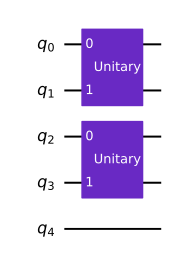

In [3]:
from qiskit import QuantumCircuit

qv_layer = QuantumCircuit(SIZE)
for pair in range(SIZE//2):  # number of pairs is SIZE/2
    qubit_indices = qubit_list[pair*2:pair*2+2]
    gate = random_unitary(4)
    qv_layer.append(gate, qubit_indices)

qv_layer.draw()

これで量子ビットのリストから層を作成することができます。必要なことは、量子ビットの順番をランダムに変えて繰り返すことだけです。Pythonにはリストをシャッフルする関数が組み込まれています（これは「インプレースで」動作するので、`qubit_lists`が参照するデータは変更されることに注意してください）。

In [4]:
from random import shuffle
shuffle(qubit_list)
qubit_list

[2, 4, 3, 0, 1]

<!-- ::: q-block.exercise -->

## 練習問題

関数<code>random_square_circuit(n)</code>を作成し、整数<code>n</code>を受け取り、量子ボリューム実験に使用できる幅と深さ<code>n</code>のランダムな<code>QuantumCircuit</code>を返してください。あなたの解答には、上記のコードを使用してもかまいません。

[IBM Quantum Labで試してみましょう](https://quantum-computing.ibm.com/lab)

<!-- ::: -->


Qiskitは回路クラス`QuantumVolume`（ここでは`QuantumVolumeCircuit`としてインポート）も提供していて、この回路を作成してくれます。私たちは使いたい量子ビットの数を指定する必要があるだけです。下のセルでは、4量子ビットの量子ボリューム回路を作成し、量子ボリュームが16であることをテストしています。

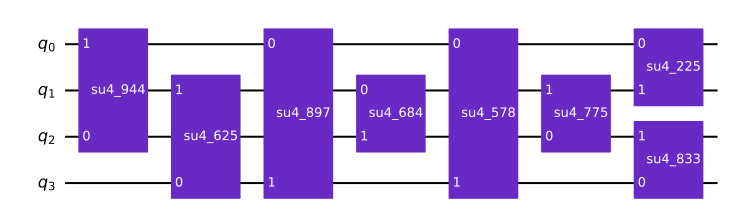

In [5]:
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
qv_circuit = QuantumVolumeCircuit(4)
qv_circuit.decompose().draw()  # .decompose() unrolls the circuit one level

## 回路を実行する

では、量子回路が正しく実行されているかどうかは、どうすれば分かるのでしょうか？量子ボリュームプロトコルは、テストする量子デバイスだけでなく、完璧なシミュレーター上でも実行されます。そして、シミュレーション結果（量子コンピュータが*すべき*こと）と実験結果（量子コンピュータが*実際に行う*こと）を比較することができます。

![量子ボリューム回路](images/qv_device_v_sim.png)

## 理想的な量子コンピューターは何をするのか？

各回路には理想的な出力分布があります。この分布は、完全な量子コンピューターで回路を実行した場合、ショット数が無限に近づいたときに見られるものです。Qiskitの`Statevector`クラスを使うと、小さな回路でこの理想的な分布を計算することができます。上で作成した4量子ビットの回路で試してみましょう。

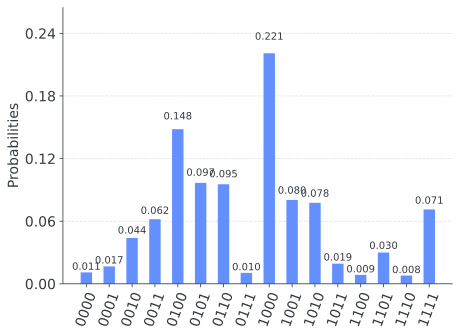

In [6]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
ideal_results = Statevector.from_instruction(
                                           qv_circuit).probabilities_dict()
plot_histogram(ideal_results)

回路の*ヘビー・アウトプット*とは、発生確率が中央値より大きい出力（高頻度出力）のことです。どのような回路でも、可能な出力の半分がヘビー・アウトプットとなります。

![計算基底状態](images/qv_heavy_outputs.svg)

以下は、実験のカウントからヘビー・アウトプットを抽出する関数<code>get_heavy_outputs</code>です。


In [7]:
def get_heavy_outputs(counts):
    """Extract heavy outputs from counts dict.
    Args:
        counts (dict): Output of `.get_counts()`
    Returns:
        list: All states with measurement probability greater
              than the mean.
    """
    # sort the keys of `counts` by value of counts.get(key)
    sorted_counts = sorted(counts.keys(), key=counts.get)
    # discard results with probability < median
    heavy_outputs = sorted_counts[len(sorted_counts)//2:]
    return heavy_outputs

print(get_heavy_outputs(ideal_results))

['0011', '1111', '1010', '1001', '0110', '0101', '0100', '1000']


各回路をデバイスで動作させ、ヘビー・アウトプットとなった出力の数を記録します。<br>ヘビー・アウトプット・ストに合格するためには、ヘビー・アウトプットを測定する確率が3分の2以上であることが必要です。つまり、十分な数の回路で、以下のようになるということです。

$$\frac{\class{qv_nh}{n_h}}{\class{qv_nc}{n_c}\class{qv_ns}{n_s}}\gt{\frac{2}{3}}$$

ここで、$n_h$ は測定したヘビー・アウトプットの数、$n_c$ は作成した回路の数、$n_s$ は各回路を実行した回数（ショット数）です。しかし、「十分に大きい」実験回数とは、どのように決めればよいのでしょうか。まず、量子ボリュームでは、少なくとも100個の回路を実行することが必要で、そうでなければテストは無効となります。次に、約97%の信頼度を確保するために調整された閾値が使われます。

$$\frac{\class{qv_nh}{n_h} -\cssId{qv_z}{z}\sqrt{\class{qv_nh}{n_h}(\class{qv_ns}{n_s}-\cssId{qv_nhnc}{\frac{n_h}{n_c}})}}{\class{qv_nc}{n_c}\class{qv_ns}{n_s}}\gt\frac{2}{3}$$

新しい項（平方根で囲まれた項）を加えるには、不等式を満たすためにヘビー・アウトプットの確率を大きくするか、より多くの回数を走らせる必要があります。新しい項は他の項よりゆっくり成長するので、多くの回数を実行すると、この不等式は上に示した、より単純なものに似てきます。量子ボリュームテストが上記の不等式を満たす場合、ヘビー・アウトプットの確率が2/3より大きい確率は少なくとも97%です。

以下に、この不等式を評価する関数(<code>check_threshold</code>)を示します。


In [8]:
def check_threshold(nheavies, ncircuits, nshots):
    """Evaluate adjusted threshold inequality for quantum volume.
    Args:
        nheavies (int): Total number of heavy outputs measured from device
        ncircuits (int): Number of different square circuits run on device
        nshots (int): Number of shots per circuit
    Returns:
        Bool:
            True if heavy output probability is > 2/3 with 97% certainty,
            otherwise False
    """
    from numpy import sqrt
    numerator = nheavies - 2*sqrt(nheavies*(nshots-(nheavies/ncircuits)))
    return bool(numerator/(ncircuits*nshots) > 2/3)

<!-- ::: q-block.exercise -->

## 練習問題

これで、量子デバイスが特定の量子ボリュームを達成できるかどうかを確認するために必要なものはすべて揃いました。以下は、あるデバイスが特定の量子ボリュームを達成できるかどうかをチェックするアルゴリズムのステップです。正しく順序付けしてみてください。

アルゴリズムが量子ボリュームテストに合格するかどうかをテストするアルゴリズム。
    入力: <code>d, nc > 100, ns</code>


    q-drag-and-drop-code
        .line Let nh = 0
        .line For nc repetitions do:
            .line Let U be a randomly generated d×d quantum circuit
            .line Let Hu be a list of U’s heavy outputs
            .line For ns repetitions do:
                .line Let x be the result of executing U on the device
                .line If x is in Hu:
                    .line Increase nh by 1
        .result-info.md Return evaluation of $\phantom{a}\frac{n_h {-} z\sqrt{n_h({n_s}-{\frac{n_h}{n_c}})}}{n_cn_s}\gt\frac{2}{3}$

<!-- ::: -->



以下は、Qiskitのコードとしてのアルゴリズムです。

In [9]:
from qiskit import transpile
def test_qv(device, nqubits, ncircuits, nshots):
    """Try to achieve 2**nqubits quantum volume on device.
    Args:
        device (qiskit.providers.Backend): Device to test.
        nqubits (int): Number of qubits to use for test.
        ncircuits (int): Number of different circuits to run on the device.
        nshots (int): Number of shots per circuit.
    Returns:
        Bool
            True if device passes test, otherwise False.
    """
    def get_ideal_probabilities(circuit):
        """Simulates circuit behaviour on a device with no errors."""
        state_vector = Statevector.from_instruction(
                circuit.remove_final_measurements(inplace=False)
            )
        return state_vector.probabilities_dict()

    def get_real_counts(circuit, backend, shots):
        """Runs circuit on device and returns counts dict."""
        t_circuit = transpile(circuit, backend)
        job = backend.run(t_circuit,
                          shots=shots,
                          memory=True)
        return job.result().get_counts()

    # generate set of random circuits
    qv_circuits = [
        QuantumVolumeCircuit(nqubits) for c in range(ncircuits)
    ]

    nheavies = 0  # number of measured heavy outputs
    for circuit in qv_circuits:
        # simulate circuit
        ideal_heavy_outputs = get_heavy_outputs(
            get_ideal_probabilities(circuit)
        )
        # run circuit on device
        circuit.measure_all()
        real_counts = get_real_counts(circuit, device, nshots)
        # record whether device result is in the heavy outputs
        for output, count in real_counts.items():
            if output in ideal_heavy_outputs:
                nheavies += count

    # do statistical check to see if device passes test
    is_pass = check_threshold(nheavies, ncircuits, nshots)
    # calculate percentage of measurements that are heavy outputs
    percent_heavy_outputs = nheavies*100/(ncircuits * nshots)

    print(f"Quantum Volume: {2**nqubits}\n"
          f"Percentage Heavy Outputs: {percent_heavy_outputs:.1f}%\n"
          f"Passed?: {is_pass}\n")
    return is_pass

そして、これを使ってシミュレートされた[Santiago](gloss:santiago)デバイスで量子ボリューム16を達成できるかどうかを確認する例です。

In [10]:
from qiskit.providers.fake_provider import FakeSantiago
santiago = FakeSantiago()
test_qv(santiago, 4, ncircuits=150, nshots=50)

Quantum Volume: 16
Percentage Heavy Outputs: 76.1%
Passed?: True



True

<!-- ::: q-block.exercise -->

## 練習問題

Athensのシミュレートされたデバイスを用いて実現できる最大量子ボリュームはいくらでしょうか？量子ビットのリストを変更すると、どのような影響がありますか？最適化レベルを変更するとどのような影響がありますか？スコアを向上させるために何かできることはありますか？

[IBM Quantum Labで試してみましょう](https://quantum-computing.ibm.com/jupyter)

<!-- ::: -->


## Qiskitの量子ボリュームツールの使用

`qiskit-experiments`パッケージには、量子ボリュームを測定するためのツールも含まれています。まず、フェイクデバイス(`Boeblingen`)をセットアップして、このデモを行います。

In [11]:
from qiskit.providers.fake_provider import FakeBoeblingen
boeblingen = FakeBoeblingen()

次に、このデバイスとその量子ビットのサブセットを使って`QuantumVolume`実験を作成します。

In [12]:
from qiskit_experiments.library import QuantumVolume
qv_experiment = QuantumVolume(qubits=[0, 1, 2],
                              backend=boeblingen)

最後に、この実験を実行し、結果を表示します。メソッド`.analysis_results()`は異なる結果オブジェクトのリストを返すので、それらを繰り返し処理して、それぞれを表示します。

In [13]:
result = qv_experiment.run()
for analysis in result.analysis_results():
    print(analysis)

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_boeblingen). The new backend will be used, but service is not changed if one already exists.


AnalysisResult
- name: mean_HOP
- value: 0.79+/-0.04
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
AnalysisResult
- name: quantum_volume
- value: 8
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


この結果、量子ボリュームは8となり、以下のコードでアクセス可能な図が生成されます。

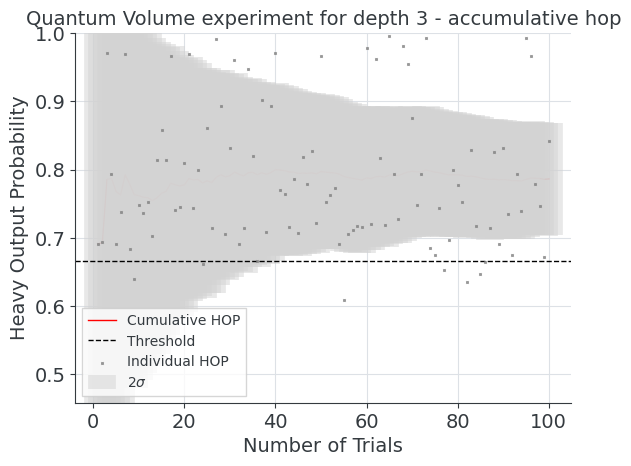

In [14]:
result.figure(0)

上の実験で量子ビットの数を増やしてみてください。Boeblingenの性能はどうでしょうか？

量子ビットの賢い選択と多くの回路を使えば、IBMが本物のBoeblingenデバイスで達成したように、模擬Boeblingenデバイスでも量子ボリューム16を達成できることは容易に想像がつきます。別の例を挙げると、以下の画像は、IBMがMontrealデバイスで行ったQV64のデモから抜粋したものです[2]。

![IBM QuantumのMontrealデバイスで測定された64の量子ボリューム](images/qv_montreal.png)

どのように実現したかは、論文で詳しく紹介されています[こちら](https://arxiv.org/pdf/2008.08571.pdf)。

## 参考文献

[1] Andrew W. Cross, Lev S. Bishop, Sarah Sheldon, Paul D. Nation, and Jay M. Gambetta, Validating quantum computers using randomized model circuits, Phys. Rev. A 100, 032328 (2019). https://arxiv.org/pdf/1811.12926

[2] Petar Jurcevic et. al. Demonstration of quantum volume 64 on a superconducting quantum computing system https://arxiv.org/pdf/2008.08571.pdf